In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\pc\Desktop\מדעי הנתונים\project\dict1.xlsx")
df.head()

,name,rate,number of reviews,starting price,cuisins,dress code,parking details,additional,Hours of operation,payment options,dining style
0,Caravaggio New York,4.7,1140 Reviews,$31 to $50,Italian,Business Casual,Nearest Parking Garages:,"Bar/Lounge, Beer, Cocktails, Delivery, Full Ba...","['Lunch', 'Daily 12:00 pm–3:00 pm', 'Dinner', ...","AMEX, Discover, MasterCard, Visa",Fine Dining
1,HAVEN Riverfront Restaurant and Bar,4.6,2803 Reviews,$31 to $50,"Contemporary American, Steak, Seafood",Smart Casual,We offer Valet and we have parking garage for ...,"Bar/Lounge, Beer, Cafe, Cocktails, Full Bar, H...","['Brunch', 'Sat 11:00 am–2:30 pm', 'Sun 11:00 ...","AMEX, Discover, MasterCard, Visa",Casual Elegant
2,The Mermaid Inn Uptown,4.7,4007 Reviews,$31 to $50,Seafood,Casual Dress,There is free street parking after 7pm Monday-...,"Beer, BYO Wine, Cafe, Corkage Fee, Full Bar, H...","['Mon–Sat 4:30 pm–10:00 pm', 'Brunch', 'Sat, S...","AMEX, Diners Club, Discover, MasterCard, Visa",Casual Dining
3,Carmine's - 91st Street - NYC,4.5,6778 Reviews,$31 to $50,"Italian, Contemporary Italian, Regional Italia...",Casual Dress,Champion Parking - 114 West 92nd St. (Between ...,"Banquet, Bar/Lounge, Beer, Cafe, Cocktails, Co...","['Mon–Thu, Sun 11:30 am–10:00 pm', 'Fri, Sat 1...","AMEX, Diners Club, Discover, MasterCard, Visa",Casual Dining
4,IL Carino Restaurant,4.7,182 Reviews,$31 to $50,Italian,Business Casual,Street Parking,"Beer, Cocktails, Full Bar, Non-Smoking, Patio/...",['Mon–Sat 4:00 pm–10:00 pm'],"AMEX, Discover, MasterCard, Visa",Elegant Dining


cleaning the data for visualization

In [3]:
#print(df[df['rate']=='No Reviews'].shape[0])
df = df[df['rate']!='No Reviews']
df['rate'] = pd.to_numeric(df['rate'])

df['number of reviews']=df['number of reviews'].apply(lambda x: x.replace(' Reviews',''))
num_reviews = pd.to_numeric(df[df['number of reviews']!='No']['number of reviews'])
replace_style = {'No' : str(num_reviews.mean())}
df['number of reviews'] = df['number of reviews'].replace(replace_style)
df['number of reviews'] = pd.to_numeric(df['number of reviews'])

df['payment options'] = df['payment options'].fillna(df['payment options'].mode()[0])
df['payment options'] = df['payment options'].str.split(", ", expand = True).notna().sum(axis=1)

df['dining style'] = df['dining style'].replace('View details', 'Casual Dining')

df['cuisins']=df['cuisins'].astype(str)
df['cuisins'] = df['cuisins'].str.split(", ", expand = True)[0]

df.additional = df.additional.fillna(df.additional.mode()[0]) 
additional = df['additional'].str.split(", ", expand = True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                4469 non-null   object 
 1   rate                4469 non-null   float64
 2   number of reviews   4469 non-null   float64
 3   starting price      4469 non-null   object 
 4   cuisins             4469 non-null   object 
 5   dress code          4469 non-null   object 
 6   parking details     4469 non-null   object 
 7   additional          4469 non-null   object 
 8   Hours of operation  4452 non-null   object 
 9   payment options     4469 non-null   int64  
 10  dining style        4469 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 419.0+ KB


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

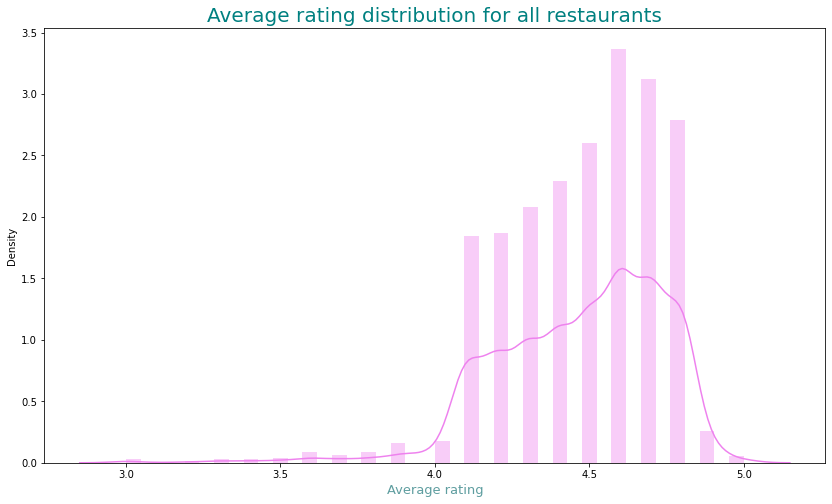

In [4]:
import seaborn as sns
dist = df
dist.rate = dist.rate.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['rate'],ax=ax,color='violet')
ax.set_title('Average rating distribution for all restaurants',fontsize=20,color='teal')
ax.set_xlabel('Average rating',fontsize=13,color='cadetblue')

## Cross-tabulation 

##Correlation between dining style and starting price##

In [5]:
pd.crosstab(index = df["dining style"], columns = df["starting price"], normalize = "index")

starting price,$30 and under,$31 to $50,$50 and over
dining style,,,
Casual Dining,0.563531,0.282211,0.154258
Casual Elegant,0.376744,0.382171,0.241085
Elegant Dining,0.000000,0.500000,0.500000
Fine Dining,0.306522,0.373913,0.319565


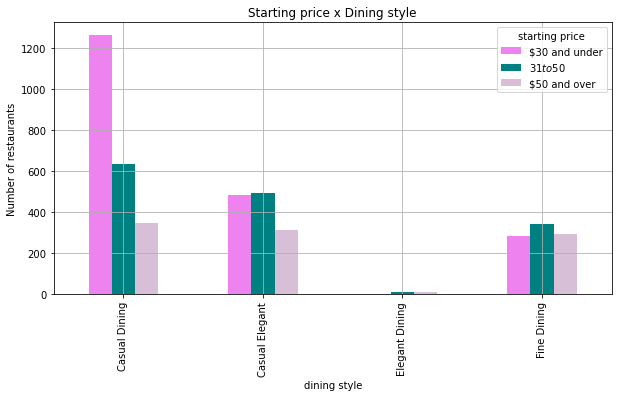

In [6]:
ct = pd.crosstab(index = df["dining style"], columns = df["starting price"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Starting price x Dining style", color = ["violet", "teal", "thistle"], 
        grid = True)
plt.ylabel("Number of restaurants")
plt.show()

##Correlation between payment options and starting price##

#[1-8] is the number of payment options each restaurant offers

In [7]:
pd.crosstab(index = df["payment options"], columns = df["starting price"], normalize = "index")

starting price,$30 and under,$31 to $50,$50 and over
payment options,,,
1,0.000000,1.000000,0.000000
2,0.947368,0.000000,0.052632
3,0.398074,0.321027,0.280899
4,0.555495,0.308791,0.135714
5,0.408615,0.365541,0.225844
6,0.350174,0.358885,0.290941
7,0.354895,0.339161,0.305944
8,0.000000,1.000000,0.000000


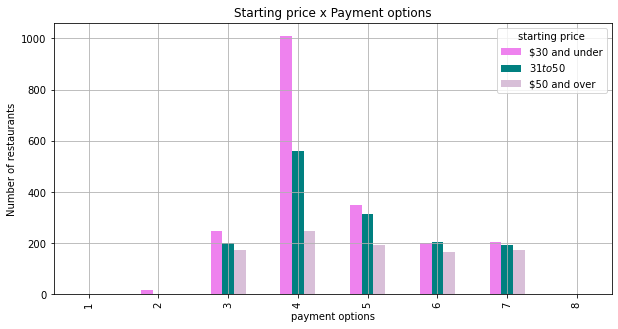

In [8]:
ct = pd.crosstab(index = df["payment options"], columns = df["starting price"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Starting price x Payment options", color = ["violet", "teal", "thistle"], 
        grid = True)
plt.ylabel("Number of restaurants")
plt.show()

##Correlation between Dress code and Dining style##

In [9]:
pd.crosstab(index = df["dress code"], columns = df["dining style"], normalize = "index")

dining style,Casual Dining,Casual Elegant,Elegant Dining,Fine Dining
dress code,,,,
Business Casual,0.435839,0.285497,0.006074,0.272589
Casual Dress,0.613389,0.240789,0.000000,0.145823
Formal Attire,0.250000,0.000000,0.250000,0.500000
Jacket Preferred,0.142857,0.142857,0.000000,0.714286
Jacket Required,0.000000,0.000000,0.000000,1.000000
Resort Casual,0.692308,0.192308,0.038462,0.076923
Smart Casual,0.393761,0.374368,0.005059,0.226813


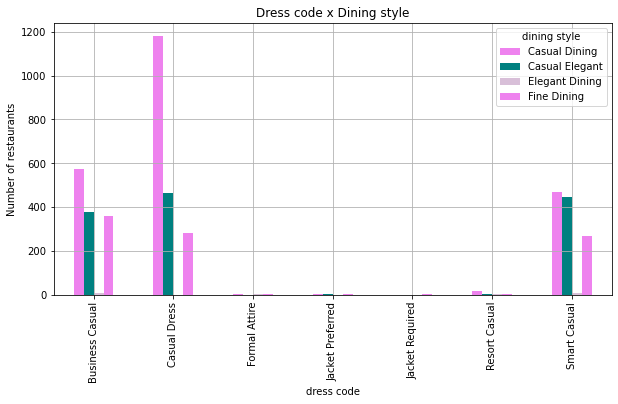

In [10]:
ct = pd.crosstab(index = df["dress code"], columns = df["dining style"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Dress code x Dining style", color = ["violet", "teal", "thistle"], 
        grid = True)
plt.ylabel("Number of restaurants")
plt.show()

In [11]:
cuisins_in_numbers = []

for cuisin in df["cuisins"].value_counts().values:
    if cuisin >= 100:
        cuisins_in_numbers.append(cuisin)
        
    else:
        pass
    

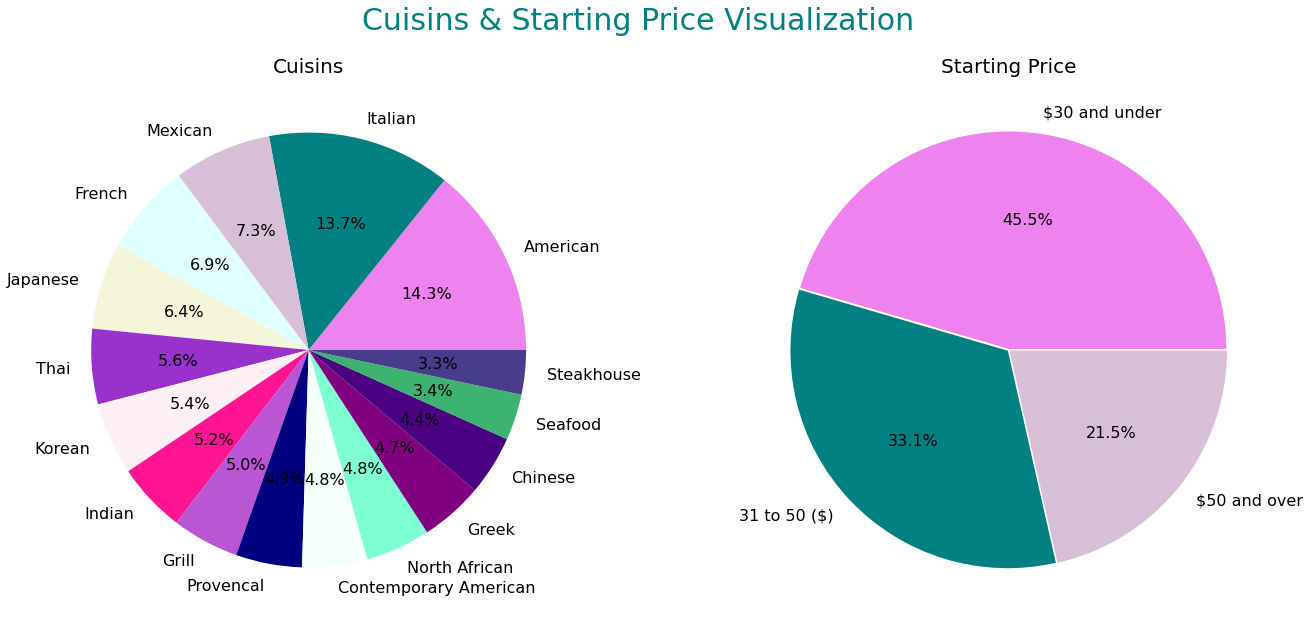

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 10))
fig.suptitle("Cuisins & Starting Price Visualization", fontsize = 30,color='teal')

axes[0].pie(x = cuisins_in_numbers, labels = df["cuisins"].value_counts().index.to_list()[0:16],
            autopct = '%1.1f%%', textprops = {'fontsize': 16}, colors = ["violet", "teal", "thistle", "lightcyan", "beige","darkorchid","lavenderblush","deeppink","mediumorchid","navy","mintcream","aquamarine","purple","indigo","mediumseagreen","darkslateblue"])
axes[0].set_title("Cuisins", fontsize = 20)

axes[1].pie(x = df["starting price"].value_counts(), explode = [0.005, 0.005, 0.005],
            labels = ["$30 and under", "31 to 50 ($)", "$50 and over"], 
            autopct='%1.1f%%', textprops = {'fontsize': 16}, colors = ["violet", "teal", "thistle"])
axes[1].set_title("Starting Price", fontsize = 20)

plt.show()

# Histograms

These histograms describe the column of additions in our table. 
We have separated the words found in this column (where each word represents additional information about the restaurant). Each of the histograms is represented in the order in which the word appears in this column.

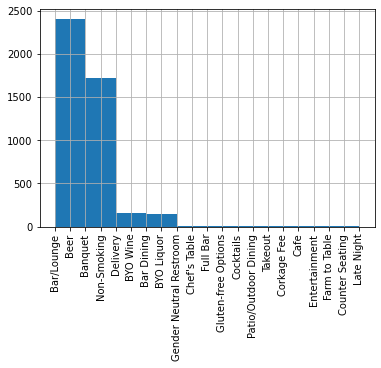

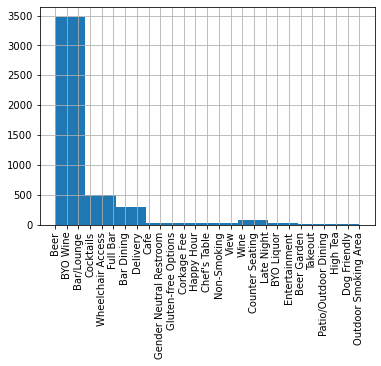

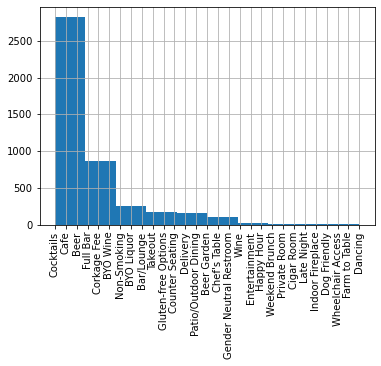

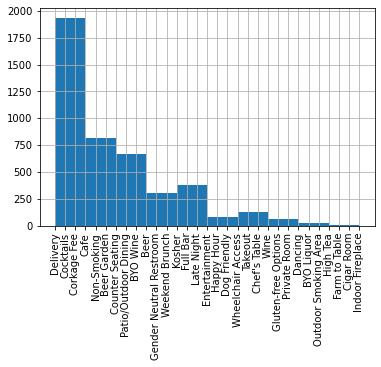

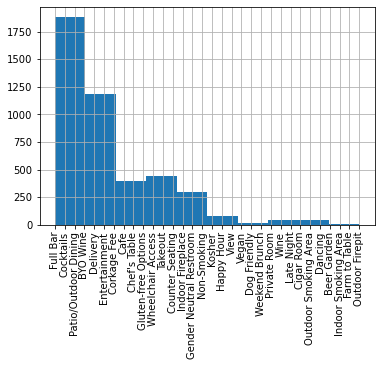

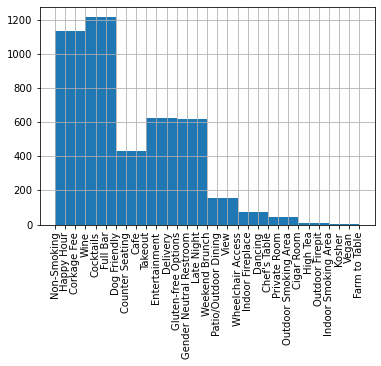

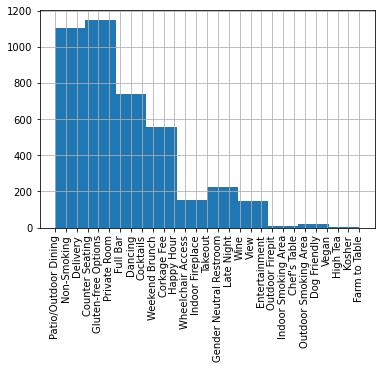

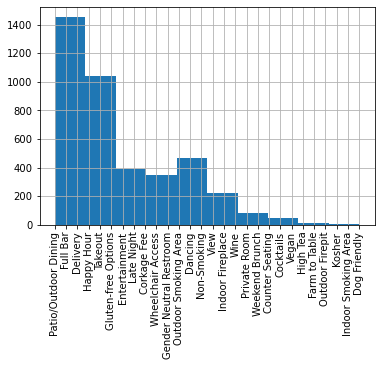

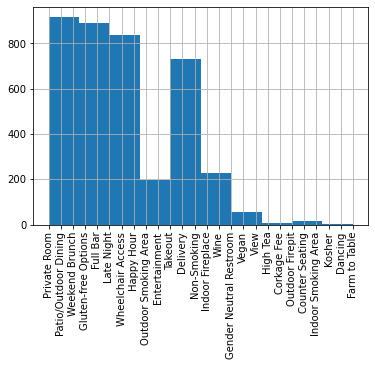

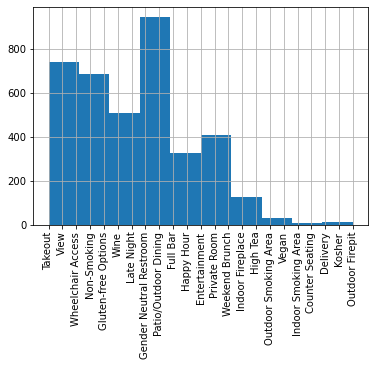

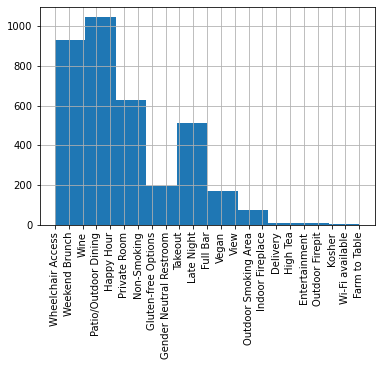

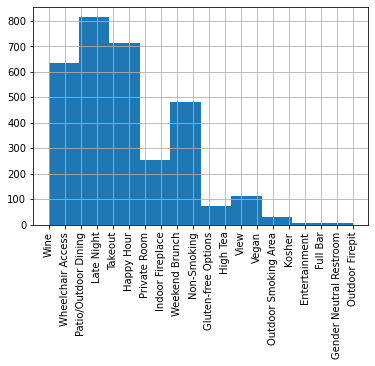

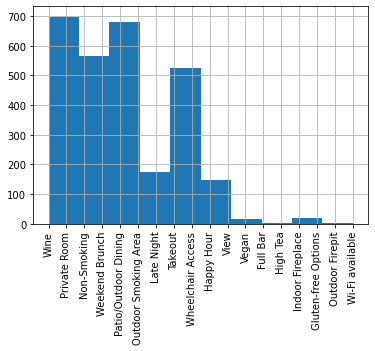

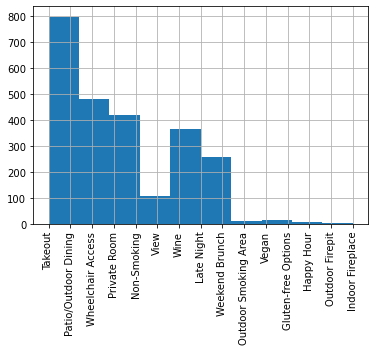

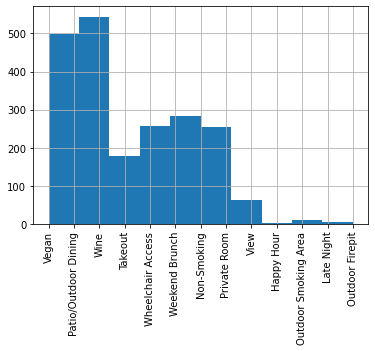

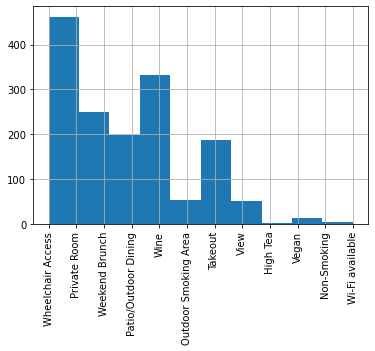

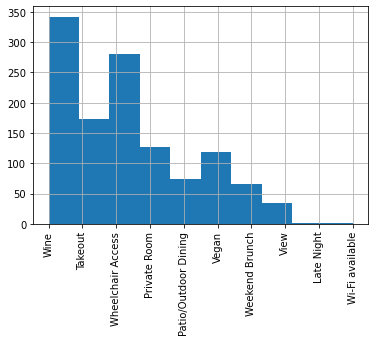

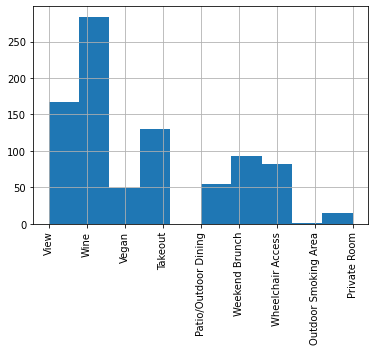

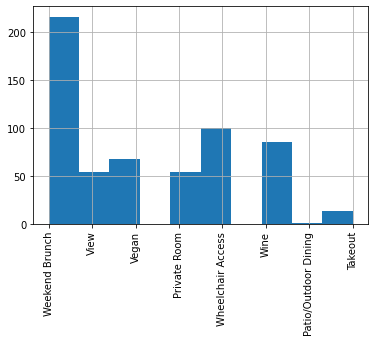

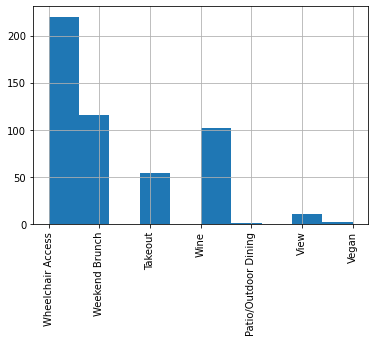

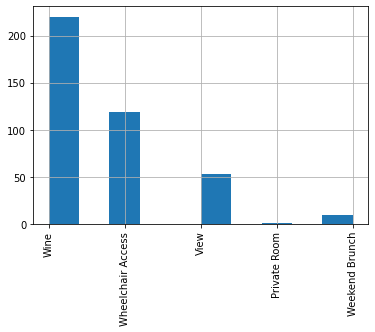

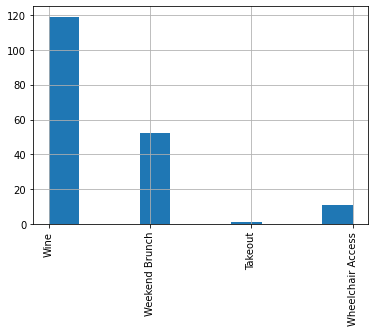

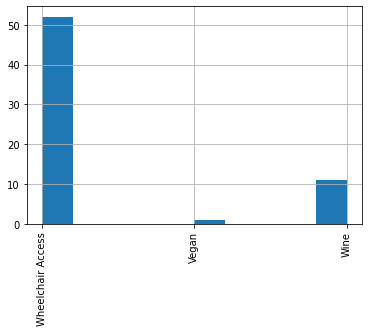

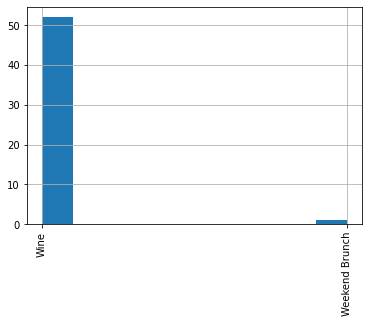

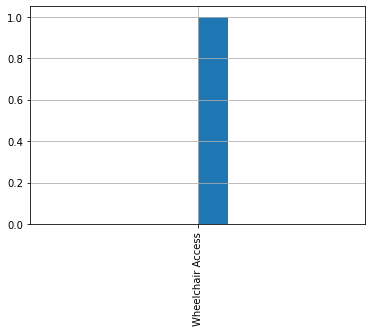

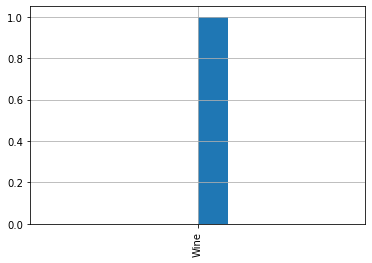

In [13]:
# from matplotlib import pyplot as plt
for col in additional:
    additional[col].hist()
    plt.xticks(rotation='vertical')
    plt.show()